In [1]:
# Cálculo de infiltración.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

import geopandas as gpd

from scipy import integrate
from scipy import optimize

In [2]:
# Dirección de los datos.
path = "../Material/Clase 16/"

# Escurrimiento.
esc_n  = "Escurrimiento.csv"
# Curva masa.
cm_n   = "curva_masa_media.csv"
# Contorno de las subcuencas.
subc_n = "Zona_36080.shp"

# Cargamos los datos.
esc = pd.read_csv(path + esc_n, index_col = "tiempo")
esc.index = pd.to_datetime(esc.index)
cm  = pd.read_csv(path + cm_n, index_col = "fecha")
cm.index = pd.to_datetime(cm.index)
cm.index.name = esc.index.name
subc  = gpd.read_file(path + subc_n)

In [3]:
# Escurrimiento.

# Gasto pico.
t_q_max = esc["ngasto"].idxmax()

# Integramos el tiempo en segundos y los gastos
# para obtener los volúmenes de escurrimiento.
V_B = integrate.simpson(esc["Q_B"], esc["seconds"])
V_D = integrate.simpson(esc["Q_D"], esc["seconds"])

# Calculamos la precipitación en exceso.
h_e = V_D * 1000 / subc.area[0]

# Tiempo pico y tiempo base en horas.
t_p = esc.loc[t_q_max, "seconds"] / 3600 
t_b = esc["seconds"].max() / 3600 

print(f"Volumen de escurrimiento base   : {V_B:7.0f} m^3")
print(f"Volumen de escurrimiento directo: {V_D:7.0f} m^3")
print()
print(f"precipitación en exceso         : {h_e:7.2f} mm")
print()

Volumen de escurrimiento base   : 61687339 m^3
Volumen de escurrimiento directo: 131298711 m^3

precipitación en exceso         :   12.88 mm



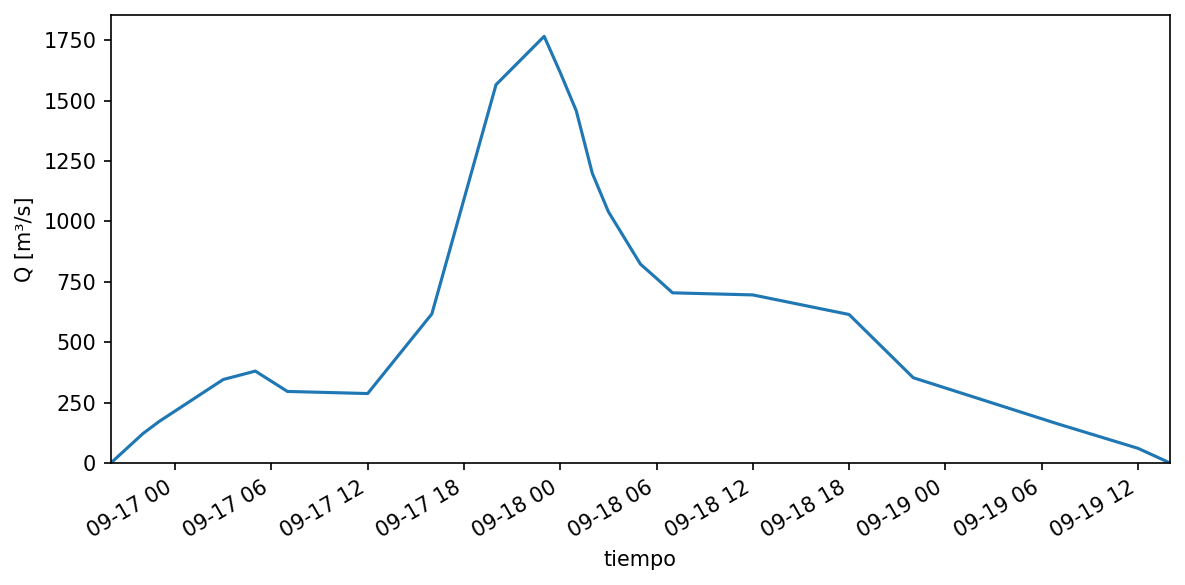

In [4]:
# Gasto directo.

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(8, 4)
fig.set_dpi(150) 

# Gasto directo.
esc["Q_D"].plot(ax = ax)

# Estilo.
ax.set_ylim(0)
ax.set_xlim( esc.index.min(), esc.index.max() )
ax.set_ylabel("Q [m³/s]")

fig.tight_layout()
plt.show()

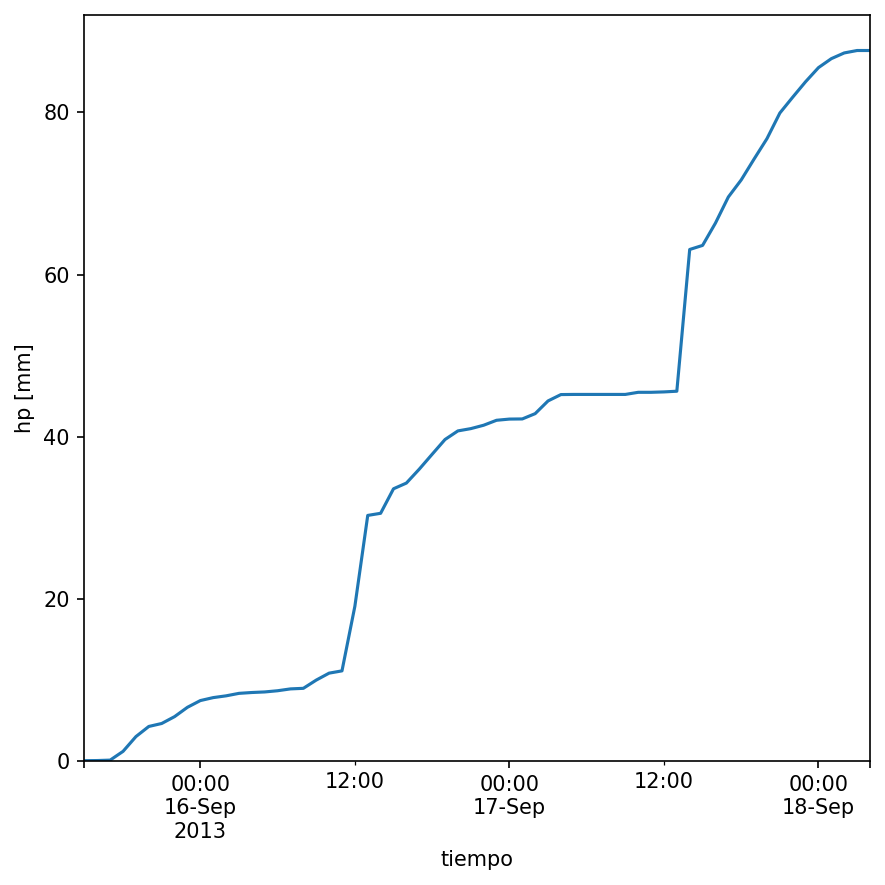

In [5]:
# Curva masa.

# Precipitación total.
h_p = cm["hp [mm]"].sum()

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(6, 6)
fig.set_dpi(150) 

# Graficamos la curva masa.
cm["curva masa [mm]"].plot(ax = ax)

# Estilo.
ax.set_ylim(0)
ax.set_ylabel("hp [mm]")

fig.tight_layout()
plt.show()

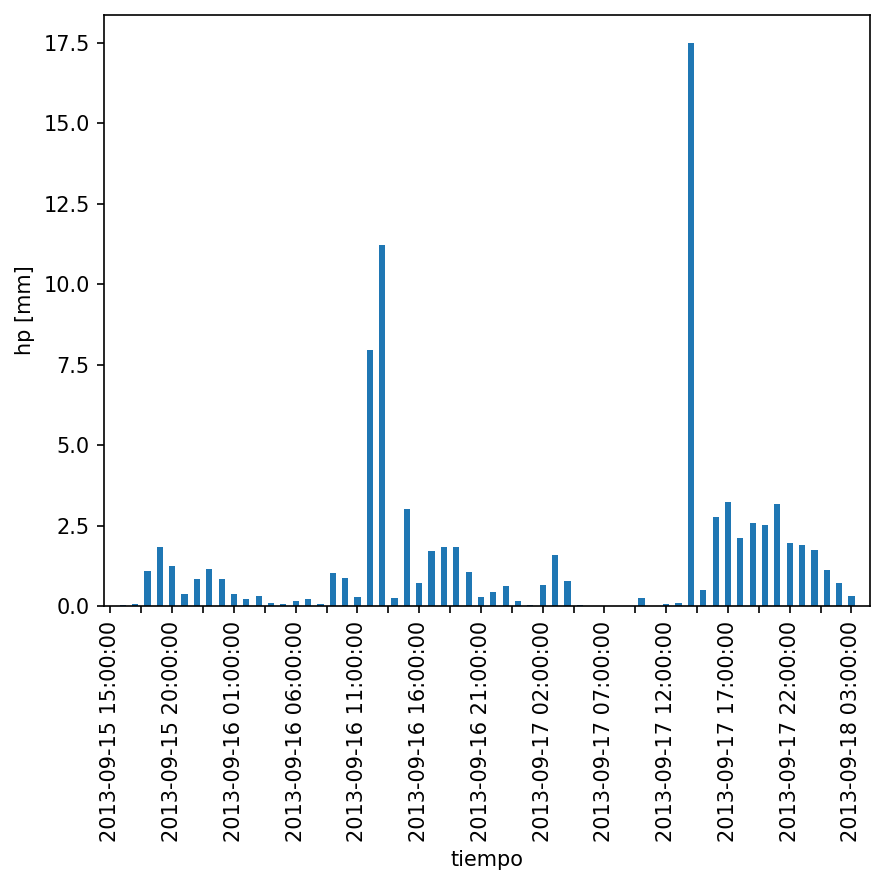

In [6]:
# Hietograma.

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(6, 6)
fig.set_dpi(150) 

# Graficamos el hietograma.
cm["hp [mm]"].plot.bar(ax = ax)

# Estilo.
ax.set_ylim(0)
ax.set_ylabel("hp [mm]")
ax.xaxis.set_major_locator( plt.MaxNLocator(30) )

fig.tight_layout()
plt.show()